<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [4]:
sleep = '/Users/meyhar/Desktop/ECON628-01-meyharmohd/datasets/sleep/sleep_bh.csv'
sleep = pd.read_csv(sleep)

In [10]:
#Getting basic read into data
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [11]:
#This code describes the basic stats of the dataset
sleep.describe()

/Users/meyhar/anaconda2/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,NaN,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,NaN,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,NaN,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [25]:
#1 we find missing values

sleep.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [196]:
#This code drops the missing values
#sleep.dropna()

Log hourly wage and hourly wage have missing values

## 3. Check for correlations
    Implement a correlation heatmap
---

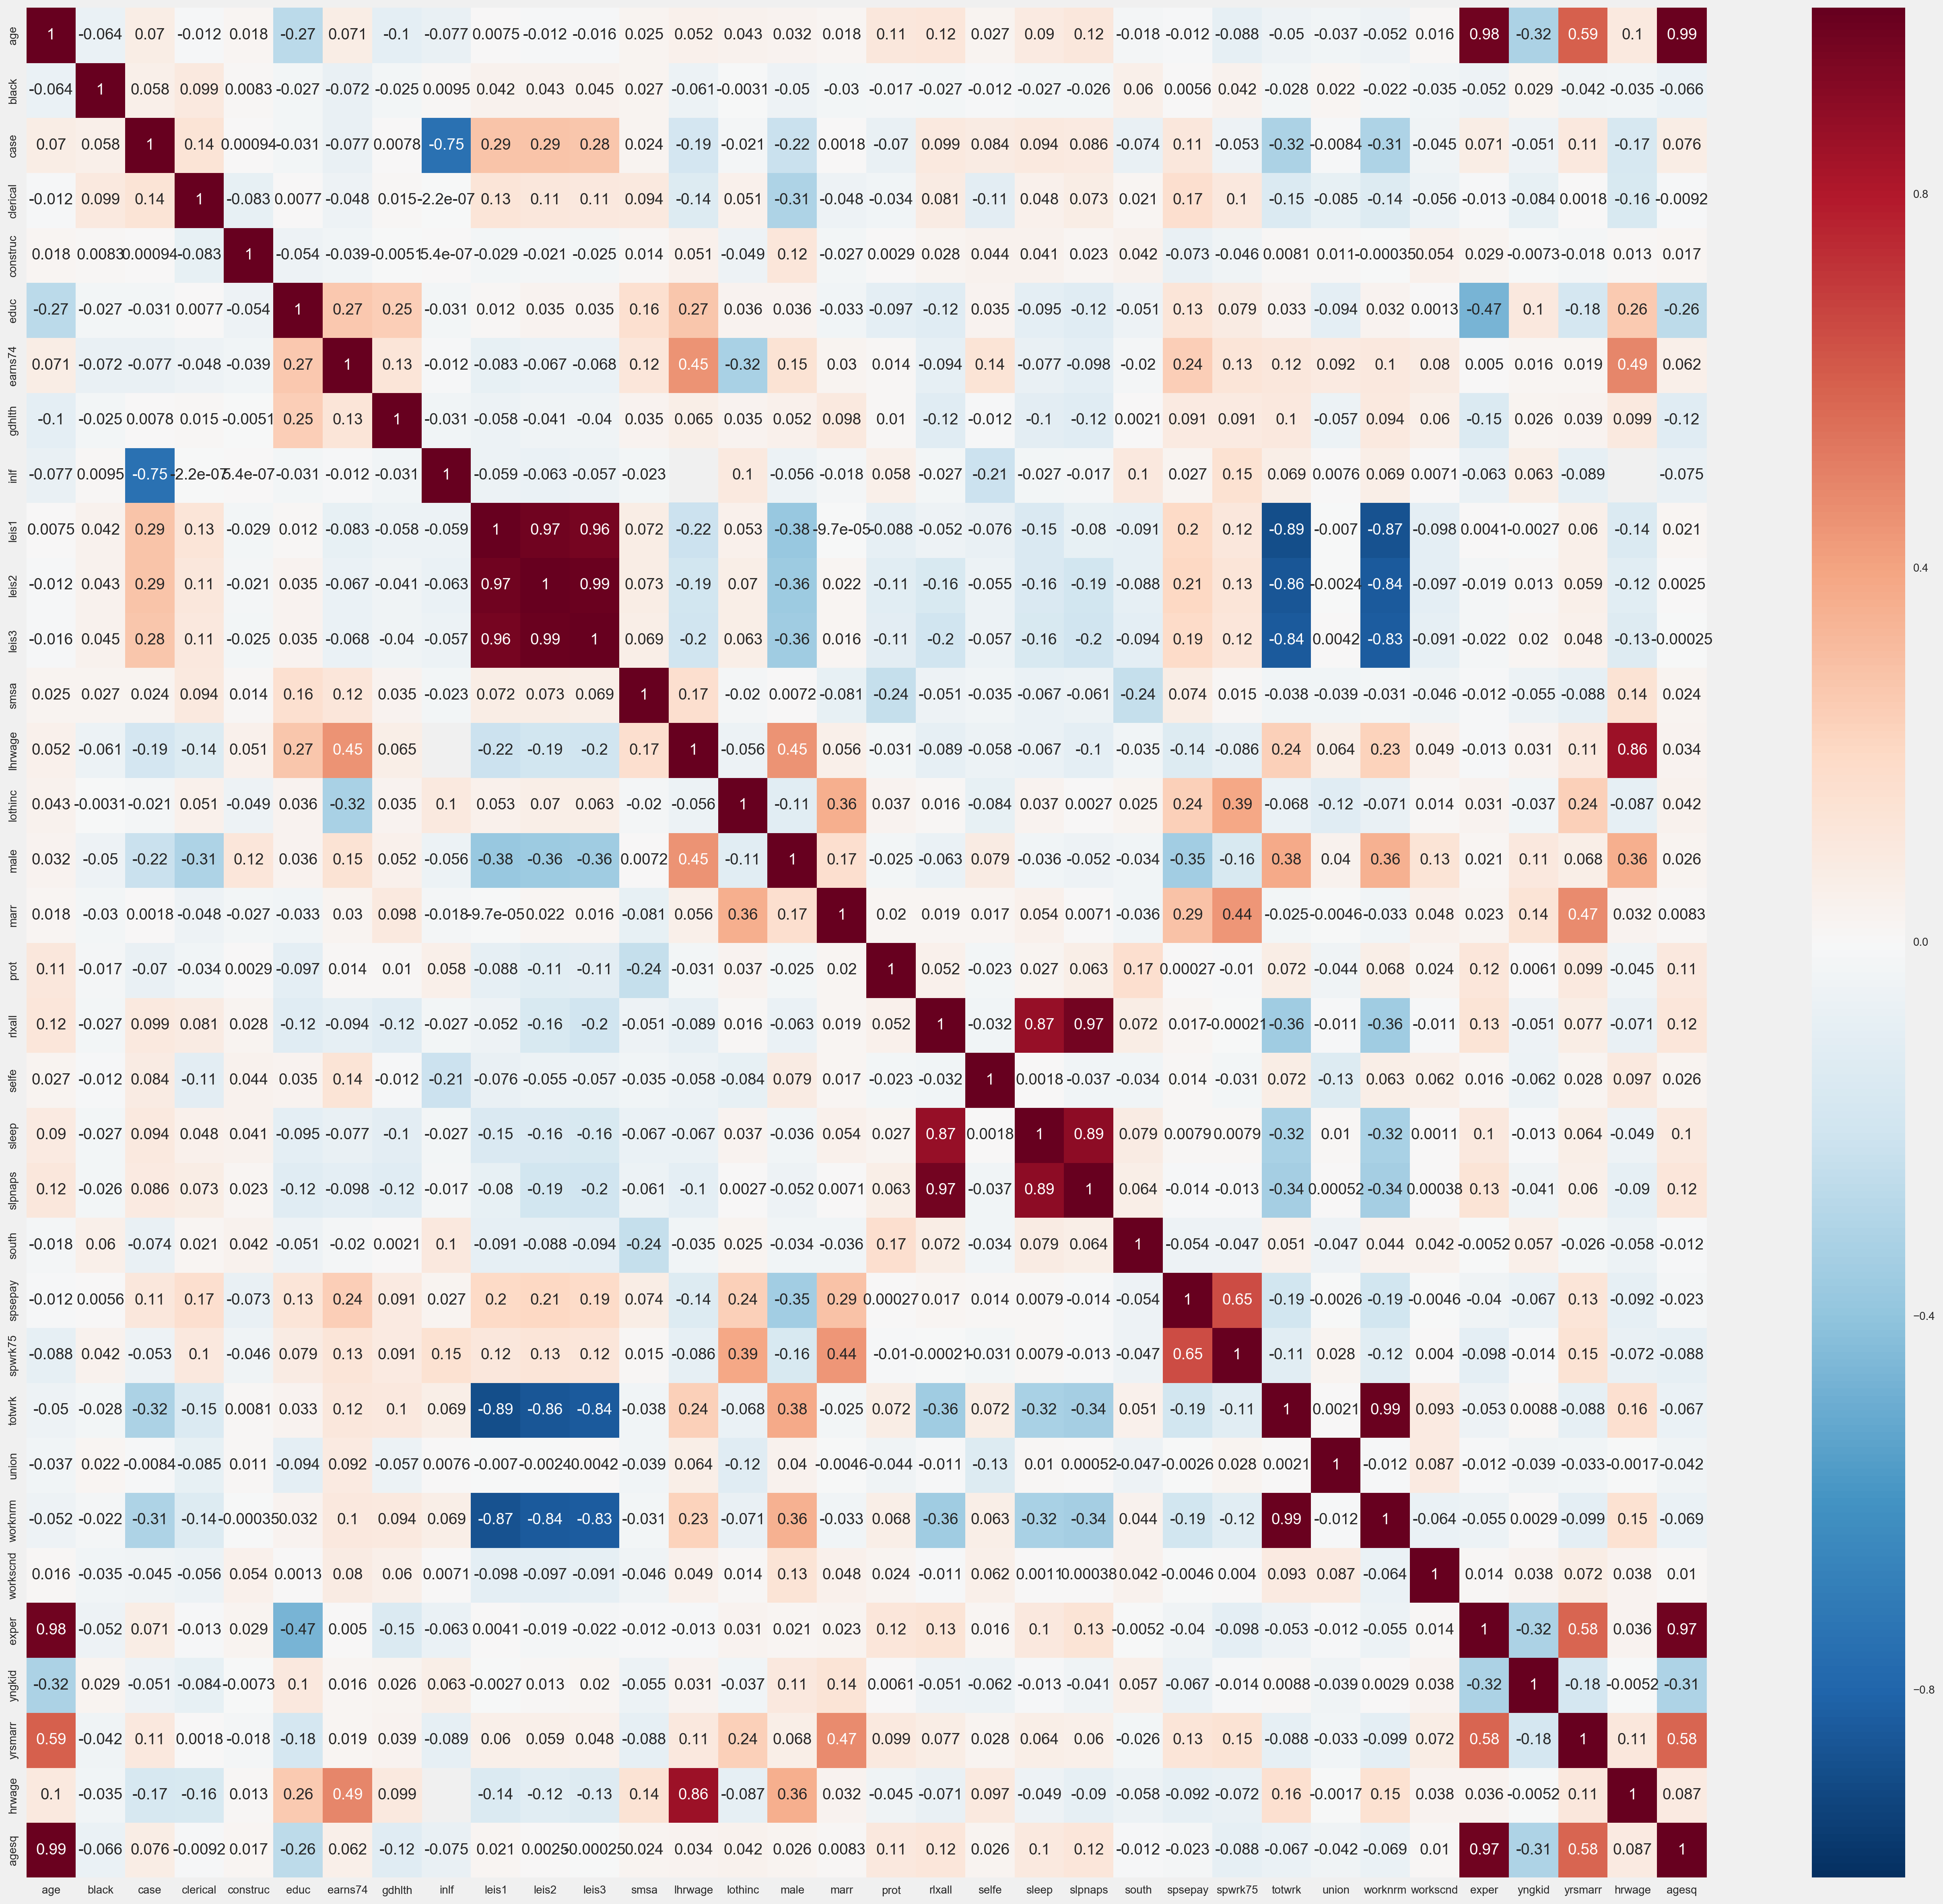

In [197]:
#We plot the correlation heat map, the darker in shade of red indicates higher positive correlation, the darker in blue shade indicates negative correlation
#Taken from class lecture on seaborn index plotting
fig = plt.figure(figsize=(30,28))
ax = fig.gca()

sns.heatmap(sleep.corr(),annot=True, ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from patsy import dmatrices
import patsy
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [38]:
#For covariates, we suspect that education, being in the labour force, being in good health, being married, minutes worked in a week affect sleep

x = sleep[['age', 'educ','inlf','totwrk','male','agesq','gdhlth','marr']]
y = sleep['sleep']

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xn = ss.fit_transform(x)


In [40]:
#Here we are creating test and train data and printing the dimensions of the matrix
#Taken from megalab lecture

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xn, y, test_size=0.3, random_state=10)
print x_train.shape, x_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(494, 8) (212, 8)


(494,) (212,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [43]:
#1 Regular OLS method to evaluate performance of model


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [45]:
from sklearn.linear_model import LinearRegression


In [46]:

l = LinearRegression()


In [48]:
#Fitting linear regression to train and test data
#Taken from megalab
l.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 4.2.1 OLS
    
---

In [80]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split

In [198]:
#Here we are defining a function that predicts the mean square error on both test and train data from the best estimate mode
#Taken from megalab
#Then we print the value of the train and test MSE

def rsquare_meansquare_error(train_y, test_y, train_x, test_x, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_x)
    y_test_pred = best_model.predict(test_x)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))


In [199]:
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "OLS", l)

MSE OLS train data: 161433.40, test data: 201400.78
R^2 OLS train data: 0.14, test data: 0.08


In [200]:
#This code does the cross validation of the R^2 on the train data


linreg_scores = cross_val_score(l, x_train, y_train, cv=10)

print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 0.16597778  0.1010486   0.02578238 -0.00591425  0.04126565  0.16414186
  0.12491463  0.03719303  0.18435914 -0.07466828]
Average R^2 OLS score: 0.076


In [202]:
#This code fits the linear reg fit into train data
lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

In [94]:

predict = lm.predict(x_test)
predict.shape

(212,)

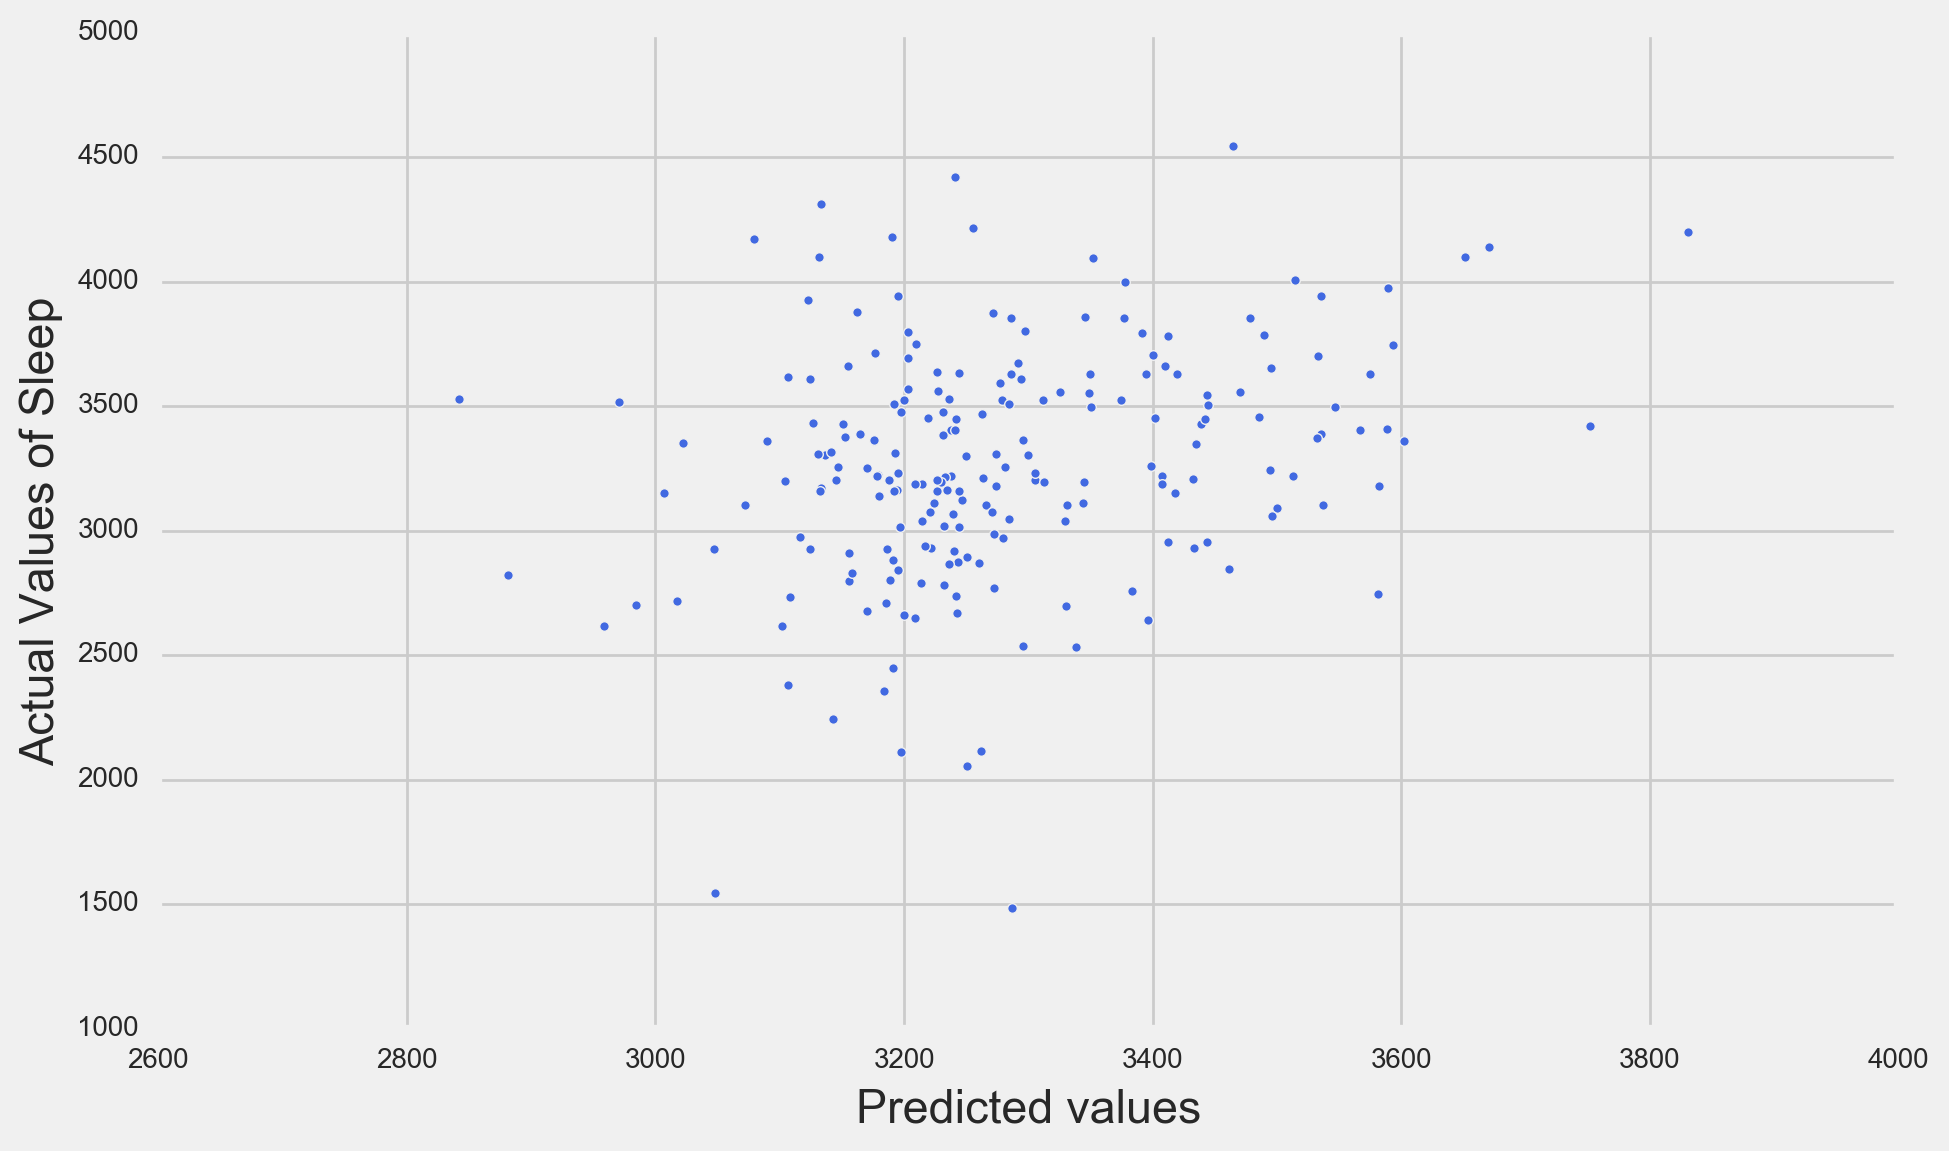

MSE: 201400.775


In [203]:
#This code plots the relation between predicted and actual values of the MSE. It basically tells us about how good our fit is

fig = plt.figure(figsize=(10,6))
plt.scatter(predict, y_test, s=12, c='royalblue', marker='o')
plt.xlabel("Predicted values")
plt.ylabel("Actual Values of Sleep")
plt.show()

print ("MSE: %.3f" % (mean_squared_error(y_test, predict)))

## 4.2.2 Regularization
    
---

In [98]:
# Using Ridge method
#Taken from megalab
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV


In [100]:
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x_train, y_train)
print (optimal_ridge.alpha_)

65.7933224658


In [102]:
#Running and fitting ridge regression: Ridge method assigns weight to correlated variates while running reg.

ridge = Ridge(alpha=optimal_ridge.alpha_)


ridge.fit(x_train, y_train)

Ridge(alpha=65.793322465756788, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [104]:
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Ridge", ridge)

MSE Ridge train data: 162084.74, test data: 201431.10
R^2 Ridge train data: 0.14, test data: 0.08


In [ ]:
#Using Lasso method: Lasso method omits the highly correlated variates

In [106]:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(x_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

21.1786509681


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [107]:
#Running and implementing lasso

lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(x_train, y_train)

Lasso(alpha=21.178650968109768, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
# Mean squared error
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Lasso", lasso)

MSE Lasso train data: 163170.33, test data: 204681.28
R^2 Lasso train data: 0.13, test data: 0.07


In [109]:
#Using elasticnet: This is a combination of both lasso and ridge

l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(x_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

21.1786509681
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    7.6s finished


In [110]:
#Running and fitting elasticnet regression

e_net = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
e_net.fit(x_train, y_train)

ElasticNet(alpha=21.178650968109768, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [111]:
#MSE
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Elastic Net", e_net)


MSE Elastic Net train data: 163170.33, test data: 204681.28
R^2 Elastic Net train data: 0.13, test data: 0.07


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [124]:
# print the coefficients to see which predictors perform the best
#From megalab
def coeff_best(x, best_regulari):
    type_coeff = pd.DataFrame({'varname': x.columns,
                            'coef':best_regulari.coef_,
                             'abs_coef':np.abs(best_regulari.coef_)})
    type_coeff.sort_values('abs_coef', inplace=True, ascending=False)
    return type_coeff.head(10)


In [125]:
coeff_best(x, lasso)


,abs_coef,coef,varname
3,129.460729,-129.460729,totwrk
5,14.584668,14.584668,agesq
1,9.800787,-9.800787,educ
0,0.000000,0.000000,age
2,0.000000,-0.000000,inlf
4,0.000000,0.000000,male
6,0.000000,-0.000000,gdhlth
7,0.000000,0.000000,marr


In [126]:
coeff_best(x, ridge)

,abs_coef,coef,varname
3,133.883374,-133.883374,totwrk
1,22.384282,-22.384282,educ
5,21.892810,21.892810,agesq
7,11.471970,11.471970,marr
4,7.962119,7.962119,male
6,5.285708,-5.285708,gdhlth
0,4.639164,4.639164,age
2,2.092836,-2.092836,inlf


In [127]:
coeff_best(x, e_net)

,abs_coef,coef,varname
3,129.460729,-129.460729,totwrk
5,14.584668,14.584668,agesq
1,9.800787,-9.800787,educ
0,0.000000,0.000000,age
2,0.000000,-0.000000,inlf
4,0.000000,0.000000,male
6,0.000000,-0.000000,gdhlth
7,0.000000,0.000000,marr


### Finding:

According to the coefficients obtained by ridge, lasso and elastic net we can say that ridge has produced more intuitive results. The covariates like being in labour force, gender, age and minutes worked in a week all do impact the minutes of sleep. 


## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [132]:

ridge.fit(x_train, y_train)
e_net.fit(x_train, y_train)
lasso.fit(x_train, y_train)

Lasso(alpha=21.178650968109768, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [137]:

def resid_fn(a):
    a_resid = y_test-a.predict(x_test)
    
print resid_fn(lasso)
print resid_fn(e_net)
print resid_fn(ridge)



None
None
None


## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [176]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()


#This code defines the parameters of the
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }


from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [177]:
#Fitting the regression tree
dtr_gs.fit(x_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [178]:
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 7}


best score 0.0907822120462


In [179]:
# Function to print best feature importance

def feature_importance(x, bst_model):
    feature_importance = pd.DataFrame({'feature':x.columns, 'importance':bst_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance


In [180]:
feature_importance(x, dtr_best)

,feature,importance
3,totwrk,0.823066
1,educ,0.120405
5,agesq,0.056529
0,age,0.000000
2,inlf,0.000000
4,male,0.000000
6,gdhlth,0.000000
7,marr,0.000000


In [181]:
y_pred_dtr= dtr_best.predict(x_test)
y_pred_dtr

array([ 3169.3875    ,  3169.3875    ,  3356.45      ,  3520.8372093 ,
        3520.8372093 ,  3169.3875    ,  3356.45      ,  3356.45      ,
        3169.3875    ,  3356.45      ,  2653.15384615,  3169.3875    ,
        3356.45      ,  3169.3875    ,  3356.45      ,  3520.8372093 ,
        3169.3875    ,  3356.45      ,  3356.45      ,  3356.45      ,
        3169.3875    ,  3169.3875    ,  3169.3875    ,  3356.45      ,
        3169.3875    ,  3169.3875    ,  3169.3875    ,  3169.3875    ,
        3169.3875    ,  3520.8372093 ,  3169.3875    ,  3356.45      ,
        3169.3875    ,  3356.45      ,  3169.3875    ,  3356.45      ,
        3356.45      ,  3169.3875    ,  3169.3875    ,  3356.45      ,
        3356.45      ,  3356.45      ,  3169.3875    ,  3169.3875    ,
        3169.3875    ,  3169.3875    ,  3520.8372093 ,  2653.15384615,
        3356.45      ,  3169.3875    ,  3520.8372093 ,  3356.45      ,
        3169.3875    ,  3356.45      ,  3169.3875    ,  3356.45      ,
      

In [183]:
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Regression tree", dtr_best)

MSE Regression tree train data: 154592.92, test data: 212895.21
R^2 Regression tree train data: 0.18, test data: 0.03


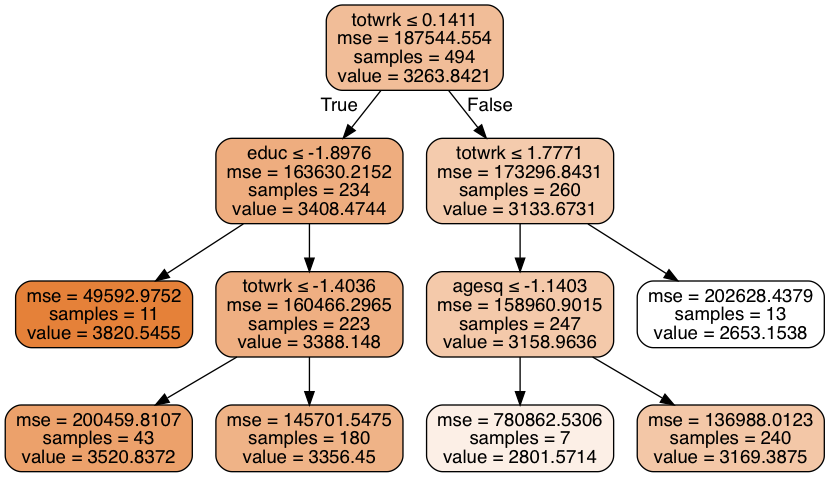

In [194]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO()


## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=x.columns)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [186]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=10,verbose=1)

In [187]:
estimator_rfr.fit(x_train, y_train)


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   27.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [188]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 5, 'n_estimators': 100, 'max_depth': 4}


best score 0.0866447823173


In [189]:
feature_importance(x, rfr_best)

,feature,importance
3,totwrk,0.744072
1,educ,0.105427
0,age,0.050062
5,agesq,0.039045
7,marr,0.030595
2,inlf,0.020655
4,male,0.009255
6,gdhlth,0.000889


In [190]:
y_pred_rfdtr= rfr_best.predict(x_test)
y_pred_rfdtr

array([ 3115.97417301,  3123.0579746 ,  3357.20557808,  3451.35368435,
        3469.43656564,  3225.47031178,  3363.81207302,  3342.44079596,
        3275.48682468,  3344.08893358,  2828.56168563,  3266.68041338,
        3350.82508828,  3140.78474622,  3346.63256236,  3442.89007696,
        3105.25215187,  3352.52929758,  3363.71373862,  3360.90430454,
        3123.0579746 ,  3247.14000058,  3150.96941891,  3336.80167321,
        3254.08737103,  3241.54020682,  3115.58465905,  3246.54039804,
        3231.488995  ,  3475.93530289,  3165.60503137,  3417.38912845,
        3165.60503137,  3380.86785176,  3163.30444255,  3367.28479434,
        3407.68331544,  3120.95955828,  3242.64222222,  3407.68331544,
        3357.59692198,  3355.99035212,  3121.81602674,  3264.09907544,
        3225.47031178,  3123.0579746 ,  3446.48661681,  2962.27931314,
        3354.57185703,  3239.50739142,  3442.89007696,  3382.75946735,
        3119.90393507,  3349.77701058,  3279.48203502,  3389.13995715,
      

In [191]:
rsquare_meansquare_error(y_train, y_test, x_train, x_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 147362.96, test data: 210884.60
R^2 Random Forest Regression tree train data: 0.21, test data: 0.04


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

Based on MSE and R^2 , random forest regression tree model performs better than the decision tree model. This is because:
1. Prediction: The best fit values of the covariates are more intuitive in random forest. Given that the sample size is relatively small, bootstrapping helps us to estimate more efficient variance. Decision tree best estimates show us that age, being in labor force, gender, nature of health and marital status do not help in predicting minutes of sleep.This is clearly counter intuitive.
2. Evaluation: R^2 of random forest test data is slightly more than that of decision tree


## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: Yes. In choosing the random forest model over the decision tree model, there was a clear tradeoff in variance and bias. Because of the bootsrapping method, the covariates could be highly correlated reducing bias of our estimator. Factors like age, marital status and being in the labor force can be very highly correlated with one another. This could result in a biased estimate on minutes of sleep.

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

1. Out of both the decision models, i chose random forest regression model. The MSE of this model is less than that of decision tree model which indicates that it might not be the best fit in terms of efficiency. 
2. However,this model takes into account the auto correlation between the predictors which can bias the coefficient to predict. Because of the random nature of bagging(bootstrapping), this could be a better fit despite a lower MSE.
3. The values of the coefficients are higher in decision tree model, indicating that there could be some unidentified bias. Random forest model breaks that bias down.